#### Question 1

In [4]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):

    result = []
    for row in data:
        result.append(row[index])

    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [5]:
#Multiple choices:
#Question 1:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [13]:
len(X[1])

200

###Question 2

In [14]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):

    result = w1*x1 + w2*x2 + w3*x3 + b

    return result

def compute_loss_mse(y_hat, y):

    result = (y_hat - y)**2

    return result

def compute_loss_mae(y_hat, y):

    result = abs(y_hat - y)

    return result

# compute gradient
def compute_gradient_wi(xi, y, y_hat):

    dl_dwi = 2*(y_hat - y)*xi

    return dl_dwi

def compute_gradient_b(y, y_hat):

    dl_db = 2*(y_hat - y)

    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):

    wi = wi - lr*dl_dwi

    return wi

def update_weight_b(b, dl_db, lr):

    b = b - lr*dl_db

    return b

In [48]:
#Multiple choices:
#Question 2:
y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [49]:
#Multiple choices:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [50]:
#Multiple choices:
#Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [51]:
#Multiple choices:
#Question 4:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [52]:
#Multiple choices:
#Question 5:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [53]:
#Multiple choices:
#Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [54]:
#Multiple choices:
#Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)


0.50001


In [55]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)


In [56]:

def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

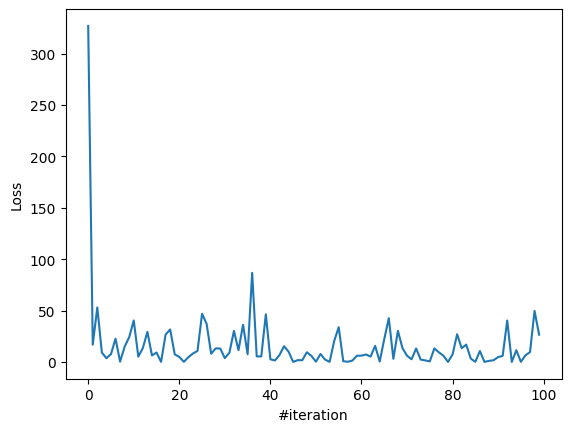

In [57]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [58]:
#Multiple choices:
#Question 8:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


#### Inference

In [59]:
#Multiple choices:
#Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [60]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 24.412408996908397


###Question 3

In [66]:

def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mae(y, y_hat)

          # accumulate loss to total loss
          loss_total += loss

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

         # accumulate gradient w1, w2, w3, b
          dw1_total += dl_dw1
          dw2_total += dl_dw2
          dw3_total += dl_dw3
          db_total += dl_db

      # (after processing N samples) - update parameters
      w1 = update_weight_wi(w1, dw1_total / N, lr)
      w2 = update_weight_wi(w2, dw2_total / N, lr)
      w3 = update_weight_wi(w3, dw3_total / N, lr)
      b = update_weight_b(b, db_total / N, lr)

      # logging
      losses.append(loss_total/N)
  return (w1,w2,w3,b, losses)

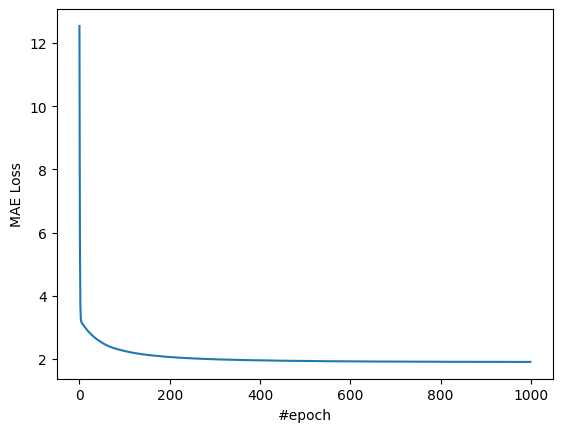

In [67]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [68]:
#Multiple choices:
#Question 11:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403
